In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import datasets,models,layers
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


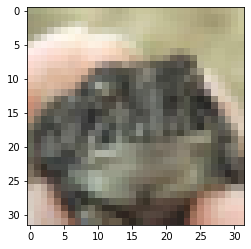

In [6]:
plt.imshow(x_train[25]);

In [7]:
# Normalizing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
#One Hot Encoding
#same and valid padding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 10)
Shape of y_test is (10000, 10)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate

In [15]:
#Building Model
model = tf.keras.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu', input_shape= (32,32,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [16]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20,verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 23s 58ms/step - loss: 1.5236 - accuracy: 0.4425 - val_loss: 1.2599 - val_accuracy: 0.5547
Epoch 2/20
391/391 [==============================] - 24s 60ms/step - loss: 1.1488 - accuracy: 0.5906 - val_loss: 1.1952 - val_accuracy: 0.5793
Epoch 3/20
391/391 [==============================] - 24s 61ms/step - loss: 0.9754 - accuracy: 0.6531 - val_loss: 1.0984 - val_accuracy: 0.6135
Epoch 4/20
391/391 [==============================] - 24s 62ms/step - loss: 0.8345 - accuracy: 0.7057 - val_loss: 1.0150 - val_accuracy: 0.6438
Epoch 5/20
391/391 [==============================] - 24s 61ms/step - loss: 0.7151 - accuracy: 0.7481 - val_loss: 1.0113 - val_accuracy: 0.6543
Epoch 6/20
391/391 [==============================] - 24s 61ms/step - loss: 0.6054 - accuracy: 0.7862 - val_loss: 1.0508 - val_accuracy: 0.6609
Epoch 7/20
391/391 [==============================] - 24s 62ms/step - loss: 0.4935 - accuracy: 0.8280 - val_loss: 1.0676 - val_accuracy:

In [19]:
_, accuracy=model.evaluate(x_train, y_train)
print('Accuracy: %2f' % (accuracy*100))

1563/1563 [==============================] - 10s 7ms/step - loss: 0.0743 - accuracy: 0.9759
Accuracy: 97.586000


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               4194816   
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                      

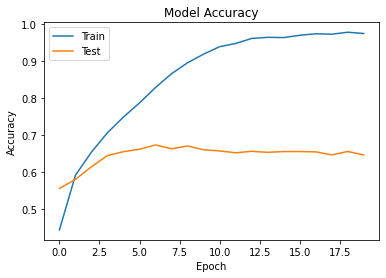

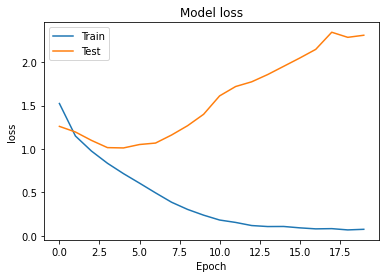

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [ ]:
# #Building Model

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), input_shape= (32,32,3),
#                           padding='same',activation='relu'),
#     tf.keras.BatchNormalization(),
#     tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.BatchNormalization(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.BatchNormalization(),
#     tf.keras.layers.Dense(10,activation='softmax'),
# ])
# model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01,momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_images, train_labels, batch_size=32, epochs=10,verbose=1, validation_data=(test_images, test_labels))

In [ ]:
# mnist = tf.keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

In [22]:
#Adding Dropout
model1 = tf.keras.Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model1.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(256,activation='relu', input_shape= (32,32,3)))
model1.add(Dropout(0.5))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=10,verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1736 - accuracy: 0.5852 - val_loss: 1.0252 - val_accuracy: 0.6506
Epoch 2/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0344 - accuracy: 0.6365 - val_loss: 0.9477 - val_accuracy: 0.6694
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9398 - accuracy: 0.6702 - val_loss: 0.9295 - val_accuracy: 0.6720
Epoch 4/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8697 - accuracy: 0.6937 - val_loss: 0.8965 - val_accuracy: 0.6849
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.7995 - accuracy: 0.7202 - val_loss: 0.8844 - val_accuracy: 0.6913
Epoch 6/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.7469 - accuracy: 0.7382 - val_loss: 0.8788 - val_accuracy: 0.6948
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6925 - accuracy: 0.7573 - val_loss: 0.9054 -

In [25]:
_, accuracy=model1.evaluate(x_train, y_train)
print('Accuracy: %2f' % (accuracy*100))

1563/1563 [==============================] - 20s 13ms/step - loss: 0.3103 - accuracy: 0.9155
Accuracy: 91.545999


In [26]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               4194560   
                                                      

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [30]:
#Final Model
model2 = tf.keras.Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Dense(256,activation='relu', input_shape= (32,32,3)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(256,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=20,verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 249s 635ms/step - loss: 2.2491 - accuracy: 0.4212 - val_loss: 2.7993 - val_accuracy: 0.2736
Epoch 2/20
391/391 [==============================] - 245s 626ms/step - loss: 1.4805 - accuracy: 0.5656 - val_loss: 1.2973 - val_accuracy: 0.5893
Epoch 3/20
391/391 [==============================] - 247s 632ms/step - loss: 1.1151 - accuracy: 0.6322 - val_loss: 0.9936 - val_accuracy: 0.6675
Epoch 4/20
391/391 [==============================] - 241s 617ms/step - loss: 0.9446 - accuracy: 0.6758 - val_loss: 1.0383 - val_accuracy: 0.6513
Epoch 5/20
391/391 [==============================] - 231s 591ms/step - loss: 0.8585 - accuracy: 0.7006 - val_loss: 0.8832 - val_accuracy: 0.6986
Epoch 6/20
391/391 [==============================] - 231s 591ms/step - loss: 0.8067 - accuracy: 0.7183 - val_loss: 0.9565 - val_accuracy: 0.6714
Epoch 7/20
391/391 [==============================] - 229s 585ms/step - loss: 0.7791 - accuracy: 0.7270 - val_loss: 0.9444 -

In [32]:
_, accuracy=model2.evaluate(x_train, y_train)
print('Accuracy: %2f' % (accuracy*100))

1563/1563 [==============================] - 53s 34ms/step - loss: 0.4774 - accuracy: 0.8306
Accuracy: 83.061999


In [33]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

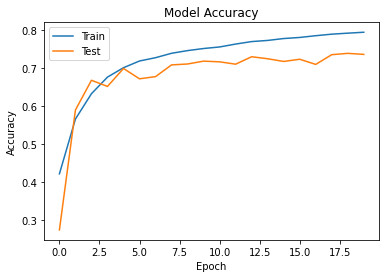

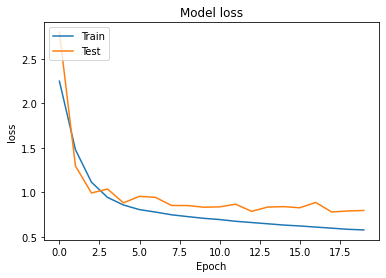

In [34]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [37]:
#Adding Dropout
model3 = tf.keras.Sequential()
model3.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(512,activation='relu', input_shape= (32,32,3)))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))
model3.add(Dense(256,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(10,activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history3 = model3.fit(x_train, y_train, batch_size=128, epochs=40,verbose=1, validation_data=(x_test, y_test))

Epoch 1/40
391/391 [==============================] - 243s 620ms/step - loss: 1.4803 - accuracy: 0.4769 - val_loss: 2.5474 - val_accuracy: 0.1788
Epoch 2/40
391/391 [==============================] - 235s 600ms/step - loss: 0.9855 - accuracy: 0.6490 - val_loss: 1.0171 - val_accuracy: 0.6479
Epoch 3/40
391/391 [==============================] - 232s 594ms/step - loss: 0.8213 - accuracy: 0.7116 - val_loss: 0.9082 - val_accuracy: 0.6950
Epoch 4/40
391/391 [==============================] - 231s 592ms/step - loss: 0.7168 - accuracy: 0.7486 - val_loss: 0.8335 - val_accuracy: 0.7153
Epoch 5/40
391/391 [==============================] - 231s 591ms/step - loss: 0.6461 - accuracy: 0.7749 - val_loss: 0.7417 - val_accuracy: 0.7497
Epoch 6/40
391/391 [==============================] - 230s 588ms/step - loss: 0.5800 - accuracy: 0.7980 - val_loss: 0.7921 - val_accuracy: 0.7276
Epoch 7/40
391/391 [==============================] - 228s 583ms/step - loss: 0.5199 - accuracy: 0.8193 - val_loss: 0.7438 -

In [39]:
_, accuracy=model3.evaluate(x_train, y_train)
print('Accuracy: %2f' % (accuracy*100))

1563/1563 [==============================] - 62s 40ms/step - loss: 0.0086 - accuracy: 0.9983
Accuracy: 99.834001


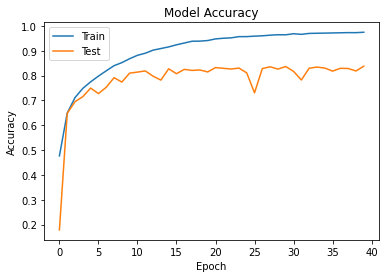

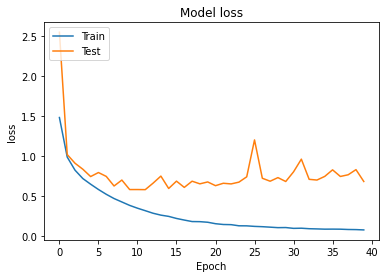

In [40]:
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [41]:
#Score trained model
scores = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 12s 37ms/step - loss: 0.6800 - accuracy: 0.8379
Test loss: 0.6800164580345154
Test accuracy: 0.8378999829292297


In [42]:
#Prediction
pred = model3.predict(x_test, verbose = 1)

313/313 [==============================] - 11s 36ms/step


In [51]:
class_pred = np.argmax(pred,axis=-1)

In [52]:
class_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [53]:
liste = ['airplane', 'bird', 'automobile', 'deer', 'dog', 'horse', 'cat',
       'truck', 'frog', 'ship']

In [54]:
array = np.array(liste)

In [55]:
array

array(['airplane', 'bird', 'automobile', 'deer', 'dog', 'horse', 'cat',
       'truck', 'frog', 'ship'], dtype='<U10')

In [56]:
class_pred = [array[i] for i in class_pred]

In [57]:
class_pred

['deer',
 'frog',
 'frog',
 'airplane',
 'cat',
 'cat',
 'bird',
 'cat',
 'deer',
 'bird',
 'airplane',
 'ship',
 'horse',
 'truck',
 'ship',
 'frog',
 'horse',
 'truck',
 'frog',
 'cat',
 'truck',
 'airplane',
 'dog',
 'ship',
 'dog',
 'deer',
 'deer',
 'airplane',
 'ship',
 'cat',
 'cat',
 'horse',
 'automobile',
 'horse',
 'ship',
 'ship',
 'dog',
 'bird',
 'ship',
 'horse',
 'dog',
 'cat',
 'horse',
 'cat',
 'airplane',
 'ship',
 'deer',
 'ship',
 'truck',
 'cat',
 'ship',
 'frog',
 'truck',
 'deer',
 'frog',
 'frog',
 'truck',
 'deer',
 'deer',
 'deer',
 'truck',
 'horse',
 'cat',
 'deer',
 'cat',
 'automobile',
 'bird',
 'automobile',
 'deer',
 'truck',
 'automobile',
 'cat',
 'frog',
 'frog',
 'airplane',
 'automobile',
 'ship',
 'deer',
 'horse',
 'frog',
 'frog',
 'bird',
 'bird',
 'truck',
 'automobile',
 'ship',
 'truck',
 'truck',
 'frog',
 'ship',
 'airplane',
 'deer',
 'frog',
 'cat',
 'dog',
 'cat',
 'cat',
 'airplane',
 'airplane',
 'truck',
 'dog',
 'horse',
 'cat',
 '

In [58]:
id_result= np.arange(1,10000+1)
output = pd.DataFrame({"id":id_result,"label":class_pred})
output

,id,label
0,1,deer
1,2,frog
2,3,frog
3,4,airplane
4,5,cat
...,...,...
9995,9996,frog
9996,9997,deer
9997,9998,horse
9998,9999,bird


In [59]:
output.to_csv("cifar10_prediction.csv",index = 0)